# **Importing libraries**

In [37]:
from sklearn import svm
from sklearn.feature_extraction.text import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools
import string

print("Libraries imported")

Libraries imported


Function to plot confusion matrix with labels

In [38]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
  
    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

# **Loading Data**
Mounting google drive

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Reading file json

In [39]:
with open('/content/drive/My Drive/ML_HW/dataset.json') as f:
 data = pd.read_json(f, lines=True)

# **Preprocessing**
We take only the necessary information

In [40]:
X=[]
for i in range(0, data.index.stop):
  X.append([data["semantic"][i], data["lista_asm"][i]])

We create a vocabulary composed by mnemonics of assembly language

In [41]:
V=[]
for i in range(0, len(X)):
  for instruction in X[i][1].split("'"):
   keyword = instruction.split(" ")
   if keyword[0] not in V and keyword[0] not in [',',']','[']:
      V.append(keyword[0])
print(V)

['jmp', 'push', 'mov', 'cmp', 'jge', 'sub', 'je', 'jl', 'jne', 'call', 'add', 'movsxd', 'pop', 'ret', 'ucomisd', 'jp', 'pxor', 'jae', 'jb', 'test', 'movapd', 'movsd', 'divsd', 'addsd', 'xorpd', 'xor', 'nop', 'lea', 'sar', 'shr', 'and', 'neg', 'cdqe', 'movzx', 'shl', 'or', 'inc', 'cmovne', 'jle', 'dec', 'bswap', 'ror', 'rol', 'xorps', 'movaps', 'movabs', 'movq', 'punpcklqdq', 'pand', 'movdqa', 'movsx', 'paddq', 'psrlq', 'por', 'pshufd', 'movd', 'cmovl', 'jbe', 'cmove', 'jg', 'setne', 'cmovle', 'cmovge', 'setl', 'sete', 'ja', 'js', 'rep', 'jns', 'jnp', 'leave', 'not', 'imul', 'cmovg', 'cmovb', 'setle', 'setg', 'pcmpeqd', 'bt', 'subsd', 'mulsd', 'andpd', 'cdq', 'idiv', 'pinsrw', 'punpcklbw', 'punpcklwd', 'pslld', 'movdqu', 'cmovns', 'shrd', 'cmovbe', 'cmova', 'cvtsi2sd', 'cvttsd2si', 'movlpd', 'mul', 'setnp', 'punpckldq', 'adc', 'stc', 'out', 'scasb', 'in', 'sbb', 'rcl', 'fiadd', 'fcom', 'wait', 'cld', 'sqrtsd', 'psllq', 'xadd', 'pshuflw', 'pcmpeqb', 'pandn', 'setp', 'movups', 'maxsd', 'm

We preprocess the list of instructions by removing all commas, brackets and other punctuation marks to make things easier for the vectorizer. In the same loop, we also prepare the vector that contains the classes for each sample in the dataset.

In [42]:
X2=[]
y_all=[]
for i in range(0, len(X)):
  X2.append(X[i][1].translate(str.maketrans('', '', string.punctuation)))
  y_all.append(X[i][0])

We create our dataset. It has N rows and |V| colums. Each ij element of this matrix counts how many times the word in the j-th column appears in the i-th sample

In [43]:
vectorizer=CountVectorizer(vocabulary=V)
X_all = vectorizer.fit_transform(X2)

# **Split Data**

Sets for first model

In [44]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_all, y_all, 
          test_size=0.3, random_state=93189)

print("Train: %d - Test: %d" %(X_train1.shape[0],X_test1.shape[0]))

Train: 10077 - Test: 4320


Sets for second model

In [45]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_all, y_all, 
          test_size=0.3, random_state=1338)

print("Train: %d - Test: %d" %(X_train2.shape[0],X_test2.shape[0]))

Train: 10077 - Test: 4320


# **Creating Models**

Model 1: SVM with linear kernel

In [46]:
model1 = svm.SVC(C=1, kernel='linear')
model1.fit(X_train1, y_train1)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

Model 2: Multinomial Naive Bayes classifier

In [47]:
model2 = MultinomialNB().fit(X_train2, y_train2)

# **Evaluation**

In [48]:
classes=["encryption", "math", "string", "sort"]

**Prediction for first model**

In [49]:
y_pred1=model1.predict(X_test1)

In [50]:
print(classification_report(y_test1, y_pred1, labels=None, target_names=classes, digits=3))

              precision    recall  f1-score   support

  encryption      0.996     0.996     0.996       834
        math      0.992     0.998     0.995      1320
      string      0.975     0.990     0.983      1192
        sort      0.992     0.964     0.978       974

    accuracy                          0.988      4320
   macro avg      0.989     0.987     0.988      4320
weighted avg      0.988     0.988     0.988      4320



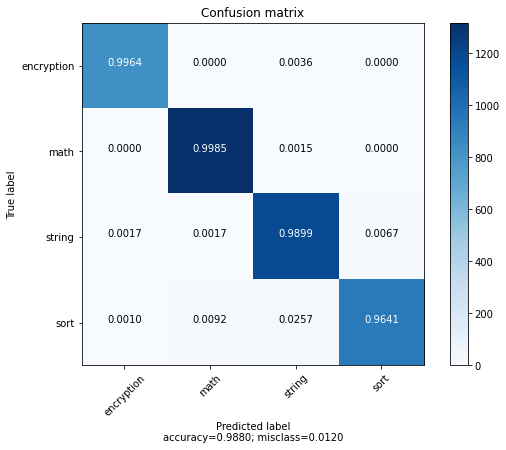

In [51]:
cm1 = confusion_matrix(y_test1, y_pred1, labels=None, sample_weight=None)
plot_confusion_matrix(cm1, classes)

Checking performances on training set to detect the presence of overfitting

              precision    recall  f1-score   support

  encryption      0.999     0.996     0.998      1890
        math      0.993     1.000     0.996      3184
      string      0.985     0.995     0.990      2873
        sort      0.996     0.972     0.984      2130

    accuracy                          0.992     10077
   macro avg      0.993     0.991     0.992     10077
weighted avg      0.992     0.992     0.992     10077



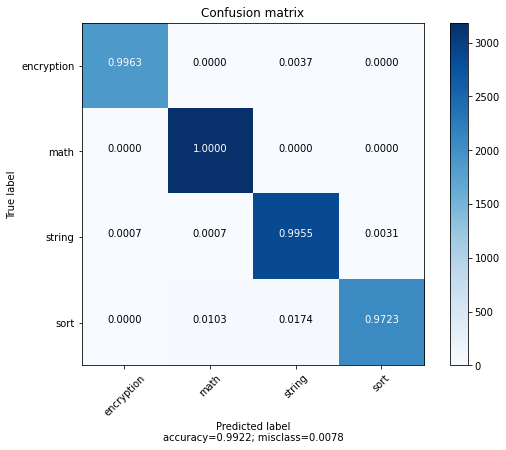

In [52]:
y_pred1tr=model1.predict(X_train1)

print(classification_report(y_train1, y_pred1tr, labels=None, target_names=classes, digits=3))
cm1tr = confusion_matrix(y_train1, y_pred1tr, labels=None, sample_weight=None)
plot_confusion_matrix(cm1tr, classes)

**Prediction for the second model**

              precision    recall  f1-score   support

  encryption      0.999     0.803     0.890       848
        math      0.974     0.911     0.942      1318
      string      0.808     0.879     0.842      1236
        sort      0.811     0.936     0.869       918

    accuracy                          0.886      4320
   macro avg      0.898     0.882     0.886      4320
weighted avg      0.897     0.886     0.888      4320



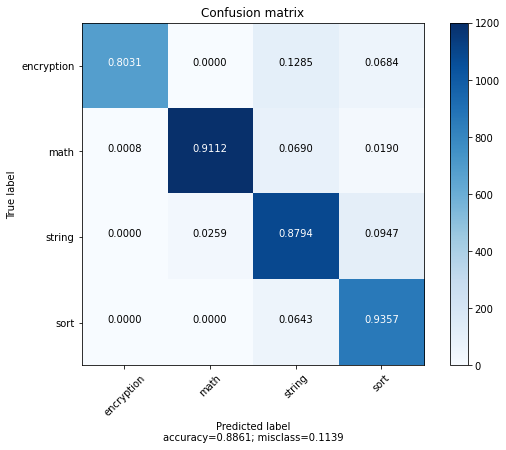

In [53]:
y_pred2 = model2.predict(X_test2)

print(classification_report(y_test2, y_pred2, labels=None, target_names=classes, digits=3))
cm2 = confusion_matrix(y_test2, y_pred2, labels=None, sample_weight=None)
plot_confusion_matrix(cm2, classes)

Once again, we check for overfitting.

              precision    recall  f1-score   support

  encryption      0.999     0.799     0.888      1876
        math      0.972     0.913     0.942      3186
      string      0.804     0.891     0.845      2829
        sort      0.822     0.920     0.869      2186

    accuracy                          0.887     10077
   macro avg      0.899     0.881     0.886     10077
weighted avg      0.897     0.887     0.889     10077



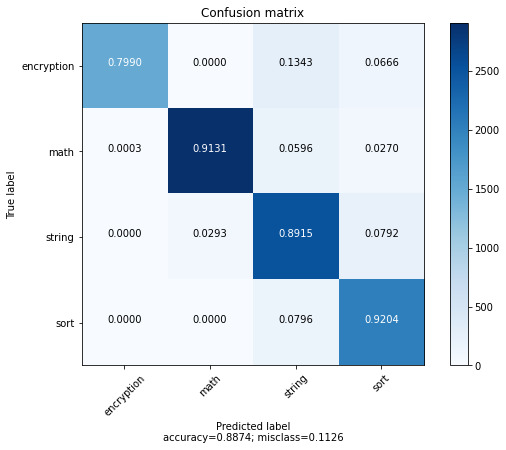

In [54]:
y_pred2tr=model2.predict(X_train2)

print(classification_report(y_train2, y_pred2tr, labels=None, target_names=classes, digits=3))
cm2tr = confusion_matrix(y_train2, y_pred2tr, labels=None, sample_weight=None)
plot_confusion_matrix(cm2tr, classes)

# **Blind test**

In [55]:
with open('/content/drive/My Drive/ML_HW/blindtest.json') as f:
 blind = pd.read_json(f, lines=True)

In [78]:
B=[]
for i in range(0, blind.index.stop):
  B.append(blind["lista_asm"][i])
B2=[]
for i in range(0, len(B)):
  B2.append(B[i].translate(str.maketrans('', '', string.punctuation)))

In [80]:
B3 = vectorizer.fit_transform(B2)
y_blind=model1.predict(B3)

In [81]:
with open('/content/drive/My Drive/ML_HW/test.txt', 'w') as w:
  for i in range(0, len(y_blind)):
    w.write(y_blind[i]+"\n")